In [1]:
from dask.distributed import LocalCluster
client = LocalCluster().get_client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 31.42 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56808,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 31.42 GiB
Comm: tcp://127.0.0.1:56837,Total threads: 4
Dashboard: http://127.0.0.1:56840/status,Memory: 7.85 GiB
Nanny: tcp://127.0.0.1:56811,


In [2]:
# imports
from dataclasses import dataclass, field, fields, InitVar

import json
import os

import pandas as pd
import dask.dataframe as dd 


In [3]:

# define a dataclass to hold the db in memory
# NOTE: this is uniquely for development purposes, data should be handled by a DB, to overcome memory limitations

@dataclass
class ClinicalTables:
    person: pd.DataFrame | None = None
    observation_period: pd.DataFrame | None = None
    death: pd.DataFrame | None = None
    visit_occurrence: pd.DataFrame | None = None
    visit_detail: pd.DataFrame | None = None
    condition_occurrence: pd.DataFrame | None = None
    drug_exposure: pd.DataFrame | None = None
    procedure_occurrence: pd.DataFrame | None = None
    device_exposure:pd.DataFrame | None = None
    measurement: pd.DataFrame | None = None
    observation: pd.DataFrame | None = None
    note: pd.DataFrame | None = None
    note_nlp: pd.DataFrame | None = None
    specimen: pd.DataFrame | None = None
    fact_relationship: pd.DataFrame | None = None
    
@dataclass 
class HealthSystemTables:
    provider: pd.DataFrame | None = None
    care_site: pd.DataFrame | None = None
    location: pd.DataFrame | None = None
    
@dataclass
class HealthEconomicsTabels:
    cost: pd.DataFrame | None = None
    payer_plan_period: pd.DataFrame | None = None
    
@dataclass
class StandartizedDerivedElementsTables:
    condition_era: pd.DataFrame | None = None
    drug_era: pd.DataFrame | None = None
    dose_era: pd.DataFrame | None = None
    episode: pd.DataFrame | None = None
    episode_event: pd.DataFrame | None = None
    cohort: pd.DataFrame | None = None
    cohort_definition: pd.DataFrame | None = None

@dataclass
class MetadataTables:
    metadata: pd.DataFrame | None = None
    cdm_source: pd.DataFrame | None = None
    
@dataclass
class VocabularyTables:
    concept: pd.DataFrame | None = None
    concept_class: pd.DataFrame | None = None
    vocabulary: pd.DataFrame | None = None
    source_to_concept_map: pd.DataFrame | None = None
    domain: pd.DataFrame | None = None
    concept_synonym: pd.DataFrame | None = None
    concept_relationship: pd.DataFrame | None = None
    relationship: pd.DataFrame | None = None
    drug_strength: pd.DataFrame | None = None

@dataclass
class OMOP_data:
    csv_data_path: InitVar[str | None] = None
    tables_structure: InitVar[dict | None] = None
    clinical_tables: ClinicalTables = field(default_factory=ClinicalTables)
    health_system_tables: HealthSystemTables = field(default_factory=HealthSystemTables)
    health_economics_tables: HealthEconomicsTabels = field(default_factory=HealthEconomicsTabels)
    standartized_derived_elements_tables: StandartizedDerivedElementsTables = field(default_factory=StandartizedDerivedElementsTables)
    metadata_tables: MetadataTables = field(default_factory=MetadataTables)
    vocabulary_tables: VocabularyTables = field(default_factory=VocabularyTables)
    
    def __post_init__(self, csv_data_path:str, tables_structure:dict):
        self.csv_data_path = csv_data_path
        self.tables_structure = tables_structure
        self._import_csv_files(tables_structure)
    
    def _import_csv_files(self, tables_structure:dict):
        for field in fields(self):
            print ("Ingesting", field.name+":")
            for table in fields(field.type):   
                print("Ingesting table", table.name+".")         
                file_path = os.path.join(self.csv_data_path, table.name+'.csv')
                if os.path.isfile(file_path):
                    try:
                        df_table = dd.read_csv(file_path, 
                                            usecols=tables_structure.get(table.name).get('column_list'),
                                            dtype=tables_structure.get(table.name).get('dtype_dict'),
                                            parse_dates=tables_structure.get(table.name).get('parse_dates')
                                            )
                        setattr(getattr(self,field.name),table.name, df_table)
                        print('Ingesting file', file_path, "was successful.")
                    except Exception as e:
                        print(e)
                        print(f"Unable to ingest {field.name}.{table.name} given {table.name}.csv file is off standards.")
                    
                else:
                    print(f"Unable to ingest {field.name}.{table.name} as there is not corresponding {table.name}.csv file.")
                
            print ("\n*****\n")

In [4]:
CSV_FOLDER_PATH = os.getenv('CSV_FOLDER_PATH')
TABLE_STRUCTURE_JSON = os.getenv('TABLE_STRUCTURE_JSON')

In [5]:
def load_pandas_db(csv_folder_path:str = CSV_FOLDER_PATH, tables_structure_json :dict = TABLE_STRUCTURE_JSON) -> OMOP_data:
     with open(tables_structure_json, 'r') as f:
          tables_structure = json.load(f)
     omop_db = OMOP_data(csv_data_path=csv_folder_path, tables_structure=tables_structure)
     return omop_db

In [6]:
omop_db = load_pandas_db()

Ingesting clinical_tables:
Ingesting table person.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\person.csv was successful.
Ingesting table observation_period.


c:\Users\super\anaconda3\envs\omop\Lib\site-packages\dask\dataframe\io\csv.py:640: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\observation_period.csv was successful.
Ingesting table death.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\death.csv was successful.
Ingesting table visit_occurrence.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\visit_occurrence.csv was successful.
Ingesting table visit_detail.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\visit_detail.csv was successful.
Ingesting table condition_occurrence.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\condition_occurrence.csv was successful.
Ingesting table drug_exposure.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\drug_exposure.csv was successful.
Ingesting table procedure_occurrence.


c:\Users\super\anaconda3\envs\omop\Lib\site-packages\dask\dataframe\io\csv.py:640: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\procedure_occurrence.csv was successful.
Ingesting table device_exposure.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\device_exposure.csv was successful.
Ingesting table measurement.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\measurement.csv was successful.
Ingesting table observation.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\observation.csv was successful.
Ingesting table note.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\note.csv was successful.
Ingesting table note_nlp.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\note_nlp.csv was successful.
Ingesting table specimen.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv\spe

In [7]:
omop_db.clinical_tables.visit_occurrence.head()

,visit_occurrence_id,person_id,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,visit_end_datetime,visit_type_concept_id,provider_id,care_site_id,visit_source_value,visit_source_concept_id,admitting_source_concept_id,admitting_source_value,discharge_to_concept_id,discharge_to_source_value,preceding_visit_occurrence_id
0,-4406053801395356975,4783904755296699562,38004207,2112-11-06,2112-11-06 11:05:00,2112-11-06,2112-11-06 11:05:00,32817,<NA>,<NA>,10035631|2112-11-06,2000001801,<NA>,<NA>,<NA>,<NA>,-3100295671072277114
1,2636026522589494723,-6225647829918357531,38004207,2153-10-17,2153-10-17 14:23:00,2153-10-17,2153-10-17 14:23:00,32817,<NA>,<NA>,10019003|2153-10-17,2000001801,<NA>,<NA>,<NA>,<NA>,-2238366349102619807
2,-8900473297538187901,7918537411740862407,38004207,2130-10-10,2130-10-10 16:20:00,2130-10-10,2130-10-10 16:20:00,32817,<NA>,<NA>,10020306|2130-10-10,2000001801,<NA>,<NA>,<NA>,<NA>,-8600570148620615801
3,-8091470952174089624,-6225647829918357531,38004207,2155-04-20,2155-04-20 09:00:00,2155-04-20,2155-04-20 09:00:00,32817,<NA>,<NA>,10019003|2155-04-20,2000001801,<NA>,<NA>,<NA>,<NA>,4782862144633917111
4,8144493519470334167,7155255168997124770,38004207,2147-07-08,2147-07-08 08:20:00,2147-07-08,2147-07-08 08:20:00,32817,<NA>,<NA>,10014354|2147-07-08,2000001801,<NA>,<NA>,<NA>,<NA>,-3275690209157700579


In [8]:
# need all parsed time fields
visit_condition_df = omop_db.clinical_tables.condition_occurrence[['condition_source_value','visit_occurrence_id','condition_end_date', 'condition_end_datetime', 'condition_start_date', 'condition_start_datetime']]\
    .join(
        omop_db.clinical_tables.visit_occurrence[['visit_occurrence_id','visit_start_date','visit_end_date', 'visit_end_datetime', 'visit_start_datetime']]\
    .set_index('visit_occurrence_id'),
        on='visit_occurrence_id',
        rsuffix='_visit'
    )

In [9]:
visit_condition_df.dask

{('blockwisemerge-70be27671e9416c3fc4113e2a65df436',
  0): (<function dask.utils.apply(func, args, kwargs=None)>, <function dask.dataframe.multi.merge_chunk(lhs, *args, result_meta, **kwargs)>, [('getitem-0b182daa2c5679faf194692b89058084',
    0),
   ('sort_index-8f80d47ef4f67d21d88d7b37974cc5de', 0)], {'how': 'left',
   'left_on': 'visit_occurrence_id',
   'right_on': None,
   'left_index': False,
   'right_index': True,
   'suffixes': ('', '_visit'),
   'indicator': False,
   'result_meta': Empty DataFrame
   Columns: [condition_source_value, visit_occurrence_id, condition_end_date, condition_end_datetime, condition_start_date, condition_start_datetime, visit_start_date, visit_end_date, visit_end_datetime, visit_start_datetime]
   Index: []}),
 ('sort_index-8f80d47ef4f67d21d88d7b37974cc5de',
  0): (<methodcaller: sort_index>, ('operation-e8edee5d8df3e1b4640438aab8dd3ad6',
   0)),
 ('operation-e8edee5d8df3e1b4640438aab8dd3ad6',
  0): (<function dask.utils.apply(func, args, kwargs=None

In [14]:
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin/"

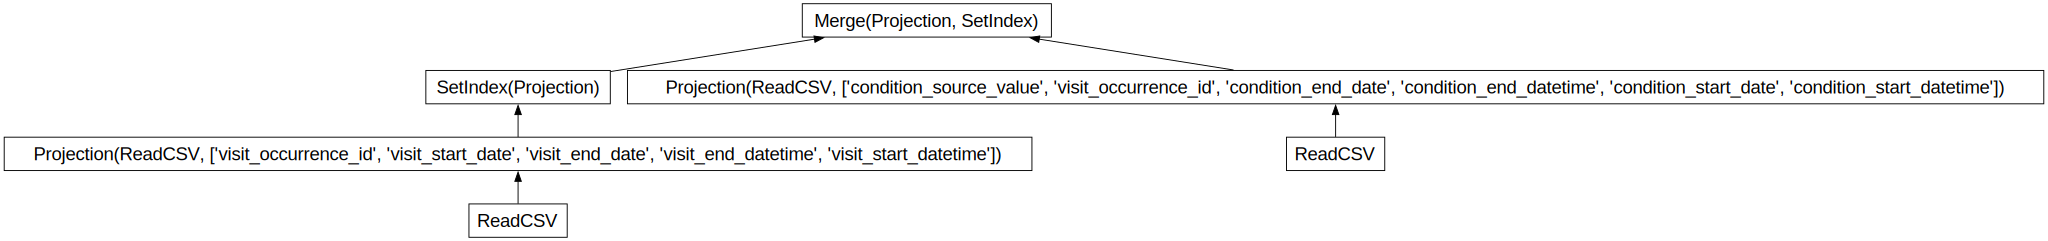

In [15]:
visit_condition_df.visualize()

In [28]:
with open(TABLE_STRUCTURE_JSON, 'r') as f:
        tables_structure = json.load(f)

In [29]:
tables_structure

{'person': {'column_list': ['person_id',
   'gender_concept_id',
   'year_of_birth',
   'month_of_birth',
   'day_of_birth',
   'birth_datetime',
   'race_concept_id',
   'ethnicity_concept_id',
   'location_id',
   'provider_id',
   'care_site_id',
   'person_source_value',
   'gender_source_value',
   'gender_source_concept_id',
   'race_source_value',
   'race_source_concept_id',
   'ethnicity_source_value',
   'ethnicity_source_concept_id'],
  'dtype_dict': {'person_id': 'Int64',
   'gender_concept_id': 'Int64',
   'year_of_birth': 'Int64',
   'month_of_birth': 'Int64',
   'day_of_birth': 'Int64',
   'birth_datetime': 'string',
   'race_concept_id': 'Int64',
   'ethnicity_concept_id': 'Int64',
   'location_id': 'Int64',
   'provider_id': 'Int64',
   'care_site_id': 'Int64',
   'person_source_value': 'string',
   'gender_source_value': 'string',
   'gender_source_concept_id': 'Int64',
   'race_source_value': 'string',
   'race_source_concept_id': 'Int64',
   'ethnicity_source_value'

In [30]:
tables_structure['drug_exposure']

{'column_list': ['drug_exposure_id',
  'person_id',
  'drug_concept_id',
  'drug_exposure_start_date',
  'drug_exposure_start_datetime',
  'drug_exposure_end_date',
  'drug_exposure_end_datetime',
  'verbatim_end_date',
  'drug_type_concept_id',
  'stop_reason',
  'refills',
  'quantity',
  'days_supply',
  'sig',
  'route_concept_id',
  'lot_number',
  'provider_id',
  'visit_occurrence_id',
  'visit_detail_id',
  'drug_source_value',
  'drug_source_concept_id',
  'route_source_value',
  'dose_unit_source_value'],
 'dtype_dict': {'drug_exposure_id': 'Int64',
  'person_id': 'Int64',
  'drug_concept_id': 'Int64',
  'drug_exposure_start_date': 'string',
  'drug_exposure_start_datetime': 'string',
  'drug_exposure_end_date': 'string',
  'drug_exposure_end_datetime': 'string',
  'verbatim_end_date': 'string',
  'drug_type_concept_id': 'Int64',
  'stop_reason': 'string',
  'refills': 'Int64',
  'quantity': 'float64',
  'days_supply': 'Int64',
  'sig': None,
  'route_concept_id': 'Int64',
  

In [26]:
vc_df = visit_condition_df.compute().drop(['condition_end_date', 'condition_end_datetime', 'condition_start_date', 'condition_start_datetime', 'visit_end_date', 'visit_end_datetime', 'visit_start_datetime'],axis=1)

In [24]:
vc_df.dtypes

condition_source_value    string[python]
visit_occurrence_id                Int64
visit_start_date          datetime64[ns]
dtype: object